In [22]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [23]:
root ='data'

# load data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root,train=True,transform=transform,download=True)
trainloader = torch.utils.data.DataLoader(
                                            trainset,
                                            batch_size=512,
                                            shuffle=True,
                                            num_workers=2
                                        )

Extracting data/cifar-10-python.tar.gz to data


In [94]:
model = torchvision.models.densenet121(pretrained=True, progress=True)
model.to(device)

optimizer = torch.optim.SGD(model.parameters(),lr=0.02,momentum=0.02)
criterion = torch.nn.CrossEntropyLoss()

In [95]:
sd = torch.load('densenet.pkl')
model.load_state_dict(sd)

<All keys matched successfully>

In [96]:
for epoch in range(50):
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        if i % 20 == 19:
            print('epoch %d, round %3d loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0


epoch 1, round  20 loss: 0.011
epoch 1, round  40 loss: 0.008
epoch 1, round  60 loss: 0.008
epoch 1, round  80 loss: 0.009
epoch 2, round  20 loss: 0.015
epoch 2, round  40 loss: 0.007
epoch 2, round  60 loss: 0.009
epoch 2, round  80 loss: 0.012
epoch 3, round  20 loss: 0.010
epoch 3, round  40 loss: 0.005
epoch 3, round  60 loss: 0.007
epoch 3, round  80 loss: 0.010
epoch 4, round  20 loss: 0.010
epoch 4, round  40 loss: 0.015
epoch 4, round  60 loss: 0.012
epoch 4, round  80 loss: 0.011
epoch 5, round  20 loss: 0.006
epoch 5, round  40 loss: 0.005
epoch 5, round  60 loss: 0.006
epoch 5, round  80 loss: 0.005
epoch 6, round  20 loss: 0.005
epoch 6, round  40 loss: 0.006
epoch 6, round  60 loss: 0.008
epoch 6, round  80 loss: 0.004
epoch 7, round  20 loss: 0.006
epoch 7, round  40 loss: 0.022
epoch 7, round  60 loss: 0.021
epoch 7, round  80 loss: 0.011
epoch 8, round  20 loss: 0.011
epoch 8, round  40 loss: 0.009
epoch 8, round  60 loss: 0.007
epoch 8, round  80 loss: 0.006
epoch 9,

In [99]:
torch.save(model.state_dict(),'densenet.pkl')



# 1. Train loss

In [100]:
import torch.nn.functional as F

In [101]:
full = 0
err = 0

for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs)
        prob,index = torch.max(F.softmax(output),dim=1)
        dif = index-labels
        
        full += index.size()[0]
        err += dif[dif!=0].size()[0]

<ipython-input-101-02cef8dedd75>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob,index = torch.max(F.softmax(output),dim=1)


In [102]:
train_loss_rate = round(err / full * 100,3)
print("Train loss is : ",train_loss_rate,"%")

Train loss is :  0.072 %


# 2. Test loss

In [103]:
# load data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root,train=False,transform=transform,download=True)
testloader = torch.utils.data.DataLoader(
                                            testset,
                                            batch_size=512,
                                            shuffle=True,
                                            num_workers=2
                                        )

Files already downloaded and verified


In [104]:
full = 0
err = 0

for i, data in enumerate(testloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs)
        prob,index = torch.max(F.softmax(output),dim=1)
        dif = index-labels
        
        full += index.size()[0]
        err += dif[dif!=0].size()[0]

<ipython-input-104-6425c2768f97>:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob,index = torch.max(F.softmax(output),dim=1)


In [105]:
test_loss_rate = round(err / full * 100,3)
print("Test loss is : ",test_loss_rate,"%")

Test loss is :  31.76 %


In [106]:
! ls

anaconda3  densenet.pkl  Documents  jupyter.sh	nohup.out  Public  Templates
data	   Desktop	 Downloads  Music	Pictures   ss.sh   Videos


# 3. Preview

In [112]:
import matplotlib.pyplot as plt

<ipython-input-161-1cf7e79f0635>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob,index = torch.max(F.softmax(output),dim=1)


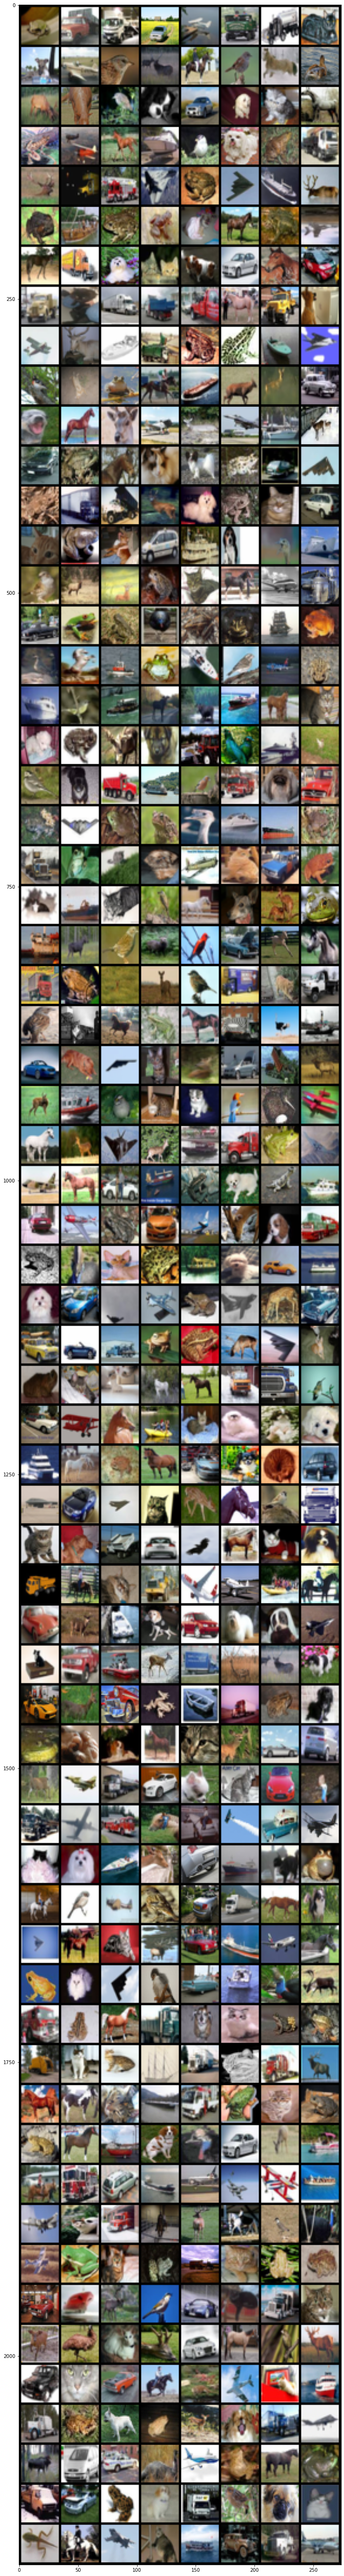

In [161]:
for i, data in enumerate(testloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs)
        prob,index = torch.max(F.softmax(output),dim=1)
        dif = index-labels
        
        
        break
df = torchvision.utils.make_grid(inputs,nrow=8,normalize=True)
df = np.transpose(df.cpu().numpy(),(1,2,0))
plt.figure(figsize=(100,100))
plt.imshow(df)

In [166]:
# dif!=0
dif

tensor([-4, -6,  0, -1,  0, -8,  0,  6, -5,  8,  0,  0,  0,  0,  0,  2,  0, -3,
         0, -2,  0,  0,  0,  0,  0,  8, -3,  0,  5,  0,  0,  0,  0, -9,  0,  0,
         0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  6, -3,  0,  0,  0, -5,  0,
         0,  0,  0,  2, -1, -8,  0,  0,  0,  2,  0,  0, -8,  0,  0,  0,  0,  0,
         4,  0,  2,  0,  0,  0, -2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  8,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  0, -2,  0,
         0, -3,  2, -8,  0,  0,  0,  0,  0, -4,  0, -6,  0,  0,  0,  0,  0,  0,
         0, -3,  2, -3,  0, -3, -8, -2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0, -8, -2,  0,
         0, -4, -2,  0,  0,  0,  0, -4, -1,  0,  8,  0,  0, -1,  4,  0,  3,  0,
        -4, -2,  1,  0,  0, -2,  4,  0,  0,  0,  0,  0, -6,  0,  0,  0,  0,  0,
         3,  0,  4,  6, -3,  0,  0, -1, -2,  0,  0, -2,  0,  0, -2, -1, -2,  0,
         0,  0,  4,  0,  0,  0,  0,  0, 

In [169]:
print(' '.join('%5s' % classes[j]
                              for j in index))

 bird   cat truck plane plane   car truck truck plane  ship  bird  deer horse  bird horse  deer  deer  deer  bird   cat   car   dog   cat horse  frog  ship  deer  ship horse   dog  frog truck  deer plane truck plane  frog plane  ship  ship  frog  ship  frog  frog   dog horse  frog  frog  deer truck   dog   cat plane   car horse   car truck   dog  ship   car truck horse truck horse plane  deer plane truck  frog  frog  ship plane  frog   cat  ship horse  ship  deer  bird   car   dog horse   dog plane  deer plane  ship  deer   car  frog horse   cat   dog  frog truck  bird  frog truck truck  deer   cat  frog   cat   car   cat  frog   cat   car  ship  bird  deer plane  bird  deer  deer  frog   cat   cat plane   cat   car  frog  frog  bird  frog  frog  ship   cat  deer  deer  ship   cat plane plane plane  frog  ship  deer  ship  deer  deer  ship horse   cat   dog  frog  deer  frog truck  bird  ship  bird  bird   dog truck  ship  bird truck   dog   car  deer plane  frog  bird plane  ship  shi

In [171]:
print(' '.join('%5s' % classes[j]
                              for j in labels))

 frog truck truck   car plane truck truck   cat   dog plane  bird  deer horse  bird horse  bird  deer horse  bird   dog   car   dog   cat horse  frog plane horse  ship  bird   dog  frog truck  deer truck truck plane  frog plane  ship  deer  frog  ship  frog  frog   dog horse  frog plane horse truck   dog   cat   dog   car horse   car truck   cat truck truck truck horse truck   dog plane  deer  ship truck  frog  frog  ship plane  bird   cat  frog horse  ship  deer  deer   car   dog horse  deer plane  deer plane  ship  deer   car  frog horse   cat   dog  frog   car plane  frog truck truck  deer   dog  frog   cat   car   cat  frog   dog   car  ship   dog  bird  ship  bird  deer  deer  frog   cat horse plane truck   car  frog  frog  bird  frog  frog  ship  frog  bird horse  ship  frog  ship  bird plane  frog  ship  bird  ship  deer  deer  ship horse   cat   dog  frog  deer   dog truck  bird plane  bird  bird   dog truck  ship  bird truck   dog truck  frog plane  frog  frog  bird  ship  shi